# Lab Eight - Space Weather With Objects

## *Bootstrap Analysis and Object Oriented Data Analysis*


You will learn how to: 

- Perform bootstrap analysis (or resampling). 
- Set up a boostrap analysis problem. 
- Analyze bootstrap outputs. 
- Plot bootstrap analysis results. 
- Use styles in Python plots (optional).
- See alternative plotting packages (optional).
- Basics of object oriented plotting (optional). 

By the end of this lab you should be able to: perform bootstrap analysis on linear problems and analyze the output. We are learning more blatant object oriented programming in this lecture as well which is optional. For your final projects you are welcome to use object oriented as well as styles plotting, but it will not be required.   

Additional materials for reading: 

- Lecture Notes - Lectures 7 & 8 & 9
- Igual & Seguí Chapter 4 for discussion in 4.3.1.3 of resampling. 
- For programming tips and object orientied see the online [Python Textbook](http://python-textbok.readthedocs.io/en/1.0/Introduction.html) and [Python Documentation](https://docs.python.org/3/tutorial/classes.html).
- For a handy look at styles in matplotlib see [here](https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html) and [here](https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html).
- Seaborn at the documentation - https://seaborn.pydata.org/

## Part A: Space Weather Review from Last Time

In Lab 7 we learned about space weather which we had defined as follows: 

"Space-weather events are naturally occurring phenomena that have the potential to disrupt electric power systems; satellite, aircraft, and spacecraft operations; telecommunications; position, navigation, and timing services; and other technologies and infrastructures..." Source - [National Space Weather Action Plan](https://obamawhitehouse.archives.gov/sites/default/files/microsites/ostp/final_nationalspaceweatheractionplan_20151028.pdf)

"Space weather refers to the environmental conditions in Earth's magnetosphere (e.g. magnetic environment), ionosphere and thermosphere (e.g. upper atmosphere) due to the Sun and the solar wind that can influence the functioning and reliability of spaceborne and ground-based systems and services or endanger property or human health." Source - [European Space Agency](http://swe.ssa.esa.int/what-is-space-weather)

In Lab 7 we looked at how the Sun through solar wind and magenetic field influenced near-space conditions at Earth. Specifically how f10.7 and sunspots could be used as a proxy to evaluate solar activity and impact on Dst.

We also used the Pierson correlation coefficent to analyze linear regression and implemented our very own classification problems with ROC analysis. 

## What questions do you have about space weather or your midterm projects? 

<img src="./Images/SpaceWeatherNOAA.jpg" alt="SpaceWeatherInfographic" width="800px"/>

Source: [NOAA](http://www.noaa.gov/explainers/space-weather-storms-from-sun)

----

## Part B: Lecture of Bootstrap Method

In this lab we will continue using space weather data, but implement the bootstrap method we learned about in Lecture 9 on Monday. 

The bootstrap method is where you repeatedly resample a dataset with replacement, ie you can have repeat values, to gain an estimation of error. 

## Take 3 minutes to chat with a neighbor. What might be some reasons we might want to resample a dataset and do a bootstrap analysis to gain an estimation of error? Recall this is beyond just the error on the y-intercept, the root mean square error, or the slope values.

### See below for the example within the class lecture notes. 
<img src="./Images/ExampleBootstrap.png" alt="ExampleBootstrapImage" height="400px" width="350px"/>


---- 


# *Part 1 - Brief Intro to Object Oriented Programming With Solar Cycle Data*

Let's take a look again at the solar cycle information we had from before. This time we are going to see a new way to plot. 

We've been using object oriented programming so far in this class, but in a very "see it and then copy it" way. 

This is a great way to start with object oriented and in effect you are ready to learn it more explicitly.

We are showing you this because it can be a very efficent and effective way to code (and useful when Googling for coding help in the future after you are done with this course).

So far we've seen object oriented programming at work with Pandas dataframes and other types of data structures (numpy ndarrays, dictionaries etc). 

We have used the following in our work: 

### Classes
- A way to bundle data and functions. Creating a type of class creates an "object".

### Objects
- In Python everything is an object and every object is an "instance" of a class. 

### Methods
- These are functions that "belong" to a class. 

### Attributes
- These are data that "belong" to a class. 

You likely saw these words as you found errors as you wrote up your homework :). You commonly run into these when you try to do something that can not be done to an "object" of a certain type. Let's see this in action. 

In [1]:
#import required modules 
import numpy as np                              #for accuracy 
import datetime as dt                           #for datetime objects
import matplotlib.pyplot as plt                 #for pretty plotting
import matplotlib as mpl                        #NEW IN THIS LAB - for styles
import pandas as pd                             #for data structures
from   scipy import stats                       #for linear regression
import matplotlib.dates as mdt                  #for manipulation of dates in matplotlib
from   matplotlib.ticker import MultipleLocator #for pretty plotting
import importlib                                #for reimporting libaries / package
import linerror as lr                           #same as Lab6 - for calculating linear fits
import externalfunctions as extFunc             #same as Lab7 - for importing
from scipy.stats import skew, kurtosis, norm    #same as in Lab5 - for normal dist. stats

import omni                                     #NEW IN THIS LAB - example
                                                #object oriented instance of omni class
import bootstrap                                #NEW IN THIS LAB - collection
                                                #of functions to calculate bootstrap
#for plotting in notebook
%matplotlib inline

## Part A. Introduction to Object Oriented 

In [3]:
#download daily, hourly, and monthly resolution data

hourlyOmni = extFunc.loadOmniData('./Data/omni2_Hourly1980_2018.lst')
dailyOmni = extFunc.loadOmniData('./Data/omni2_Daily1980_2018.lst')
monthlyOmni = extFunc.loadOmniData('./Data/omni2_27day1980_2018.lst')

#this is the data we were using last lecture

#This data is from the OMNI site - https://omniweb.gsfc.nasa.gov/html/ow_data.html#1

#"primarily a 1963-to-current compilation of hourly-averaged, near-Earth solar 
#wind magnetic field and plasma parameter data from several spacecraft in geocentric or 
#L1 (Lagrange point) orbits. The data have been extensively cross compared, and, 
#for some spacecraft and parameters, cross-normalized. Time-shifts of higher 
#resolution data to expected magnetosphere-arrival times are done for data from 
#spacecraft in L1 orbits (ISEE 3, Wind, ACE), prior to taking hourly averages."

### Let's find out what class hourly OMNI belong to...

We can use the type() function to find this - 

In [4]:
print(type(hourlyOmni))


<class 'pandas.core.frame.DataFrame'>


### Activity for you! Check the class of hourlyOmni['Dst'], and then of the first value within the column.

Try this on your own and then compare with a partner. 

Hint: you will want to use the .loc method for the first value in the column, the first value can be accessed using the index.

In [5]:
###------write your commands here




### Now let's access our the hourlyOmni dataframes attributes.

You can see all the different options for attributes in the help documentation here https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

In [6]:
#lets access our objects attributes - or data - through .shape, this accesses
#information about the object hourlyOmni

print(hourlyOmni.shape)

(334488, 13)


### Now let's access our the hourlyOmni dataframes methods.

You can see all the different options for methods in the SAME documentation as above.

In [7]:
#In the Ice Sheet lab, we used .describe() to summarize
#a dataframe. This was us using an attribute. 

print(hourlyOmni.describe())


                  BX             BY             BZ   FlowPressure  \
count  268555.000000  268555.000000  268555.000000  263181.000000   
mean       -0.019519       0.056917       0.005324       2.267442   
std         3.740846       4.185922       3.048880       1.943178   
min       -40.800000     -33.000000     -53.700000       0.000000   
25%        -2.800000      -2.700000      -1.400000       1.230000   
50%        -0.100000       0.000000       0.000000       1.800000   
75%         2.700000       2.700000       1.400000       2.680000   
max        34.800000      46.100000      37.500000      79.050000   

                  Ey             Kp  SunspotNumber            Dst  \
count  262023.000000  334224.000000  333864.000000  334488.000000   
mean       -0.000908      21.304763      88.439508     -15.400672   
std         1.485015      14.329952      78.070713      23.138020   
min       -36.110000       0.000000       0.000000    -589.000000   
25%        -0.660000      10.0000

### Notice the syntax different between .shape and .describe()? What do you think would happen if we tried .shape()? Try it below!

In [8]:
#UNCOMMENT THIS LINE

#print(hourlyOmni.shape())

### Why did we get an error for .shape() rather than .shape?


-

-

-

-


### So far we've used all these concepts before. We are just using different terminology now to be more accurate.





## Part B. Introduction to Object Oriented Concepts

In general there are three themes or ideas we use in our object-oriented programming. 

### Encapsulation. 
- This is the hallmark of object oriented. Grouping data, and functions, together as objects or "encapsulating" them. This means that programming can now be objects that you can access, do things with, not just a list. We've taken advantage of this in our use of Pandas dataframes. 

### Inheritance. 
- A trickle down hierarchy of data types. Allows a data type to aquire (inherit) the properties of another. 
- A real world example - beets are a vegetable, vegetables are food, vegetables are edible, therefore, a beet is edible.  

### Polymorphism. 
- You can use the same interface, for different types/classes. This allows for functions to use different types at different times. 
- A real world example - the steering wheel. 
- If you have different types of steering wheels in cars, power steering, manual steering, etc you would expect to use them all to drive a car the same way. 

## Part C. Putting it Together - Object Oriented Creation Example

Let's give this a shot - and see how this works if we want to make our OWN classes. 

In [9]:
class Bird():
    '''
    Creating a class called Bird - note classes first letter is in caps for Python standard..
    '''
    
    #create a method for this class
    #note the syntax where self is in the function - ie 
    #the function ACTS on itself. 
    
    def fly(self):
        print('The bird is out to fly.')

In [10]:
#create an instance of the class Bird
testBird = Bird()

In [11]:
#use the method fly
testBird.fly()

The bird is out to fly.


### Now let's try something slightly more complicated with class definitions.

In [12]:
class Bird():
    '''
    Creating a class called Bird - note classes first letter is in caps for Python standard.
    '''
    
    #what if we want to initialize with some attributes?
    def __init__(self, species = 'NotInitialized'):
        self.species = species
        
    #create a method for this class
    #note the syntax where self is in the function - ie 
    #the function ACTS on itself. 
    def fly(self):
        print('The {} is out to fly.'.format(self.species))

In [13]:
#now when we try this -
testBird = Bird()
#and acess that attribute - 
print(testBird.species)

NotInitialized


In [14]:
#now when we try this -
testBird = Bird(species = 'Eagle')
#and acess that attribute - 
print(testBird.species)


Eagle


In [15]:
#and access the method
testBird.fly()

The Eagle is out to fly.


### This is new - we've not yet defined our own classes. You can start to see where this might be useful, let's say you always need objects to be able to fly then this is a quick way to achive that.

Let's look at something we have seen before.

## Part D. How to Plot with Object Oriented. 

So far we've used plotting in a very object oriented way - IE this is pretty much the same. There are some short cuts that you can implement but the below code is **exactly the same as in Lab 7**, but now you can start to see where we've been using object-oriented programming this whole time.


(25.0, 400.0)

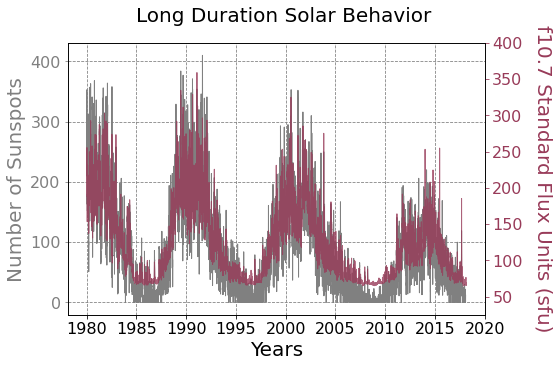

In [16]:

#Create an instance of a matplotlib figure class - 
fig = plt.figure(figsize=(8, 5))

#set the title
fig.suptitle('Long Duration Solar Behavior', fontsize=20)

#Create an instance of a matplotlib gridspec class
gs  = plt.GridSpec(1, 1, hspace=0.0, wspace=0.2, right = 0.85)

#add subplots - adds an instance of a subplot type to 
#the figure object
ax1 = fig.add_subplot(gs[0,0])


#this ties together ax1 and ax2 - 
ax2 = ax1.twinx()

#set up titles for axis
ax1.set_ylabel('Number of Sunspots', fontsize = 20, color = 'grey')
ax2.set_ylabel('f10.7 Standard Flux Units (sfu)', fontsize = 20, 
               color = '#983b59', rotation = 270, labelpad = 30)

ax1.plot(dailyOmni.index.to_pydatetime(), dailyOmni['SunspotNumber'], 
         color = 'grey', lw = 1.0)

ax2.plot(dailyOmni.index.to_pydatetime(), dailyOmni['f10.7_index'], 
         color = '#983b59', lw = 1.0, alpha = 0.8)
    
ax1.set_xlabel('Years', fontsize = 20)

#SET UP FORMAT
ax1.xaxis.set_major_locator(mdt.YearLocator(5))
ax1.xaxis.set_major_formatter(mdt.DateFormatter('%Y'))

ax1.grid(color='gray', linestyle='dashed')

#how to set up a share axis with alternative colors
ax1.tick_params('y', colors = 'grey', labelsize = 16)
ax2.tick_params('y', colors = '#983b59', labelsize = 16)

#set label size of the x axis
ax1.tick_params('x', labelsize = 16)

#nudge it up a bit 
ax2.set_ylim([25, 400])



### Can you imagine where you can save repetition if you wanted to define *your own* objects for plotting? 


## *Part 2 - Introduction to Bootstrap Analysis*


Before we saw that the number of sunspots and f10.7 were highly linear when plotted against each other and analyzed. 

### What about looking at the f10.7 and the Dst? 


Fit Report: 
 	Uncert. on Y: +/- 10.18
 	Intercept: -4.18 +/- 1.23
	Slope: -0.09 +/- 0.01
	Pearson linear correlation: -0.40, r-squared: 0.16


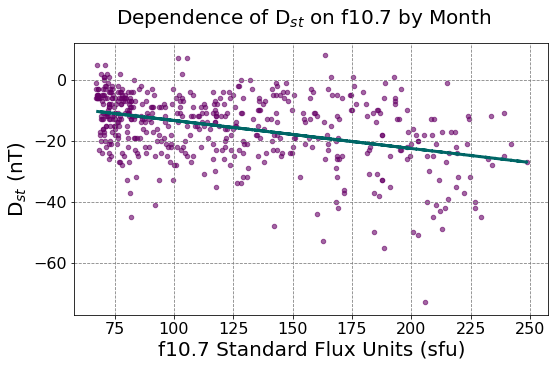

In [17]:
#since this doesn't work on nan values first we remove all potential nans' 
nanMask = ((~np.isnan(monthlyOmni['f10.7_index'])) & 
           (~np.isnan(monthlyOmni['Dst'])))

xVals = monthlyOmni.loc[nanMask, 'f10.7_index']
yVals = monthlyOmni.loc[nanMask, 'Dst']


#calculate the linear fit
slopeOrig, interceptOrig, rvalOrig, pvalOrig, stderrOrig = stats.linregress(xVals, yVals)

#calculate the yvalues given the linear fit
yModelOrig = interceptOrig + slopeOrig * xVals


#find y errors
RMSE  = lr.calcRMSE(yModelOrig, yVals)

#error on coefficents, slope and y-intercept and.
errSlope,  errInter = lr.calcCoeffsErr(xVals,  RMSE)


#print out fit report - 
print("Fit Report: \n \tUncert. on Y: +/- {:.2f}".format(RMSE) + 
      "\n \tIntercept: {:.2f} +/- {:.2f}".format(interceptOrig, errInter)
      + "\n\tSlope: {:.2f} +/- {:.2f}".format(slopeOrig, errSlope) 
      + "\n\tPearson linear correlation: {:.2f}, r-squared: {:.2f}".format(rvalOrig, rvalOrig**2))


#make plot
fig = plt.figure(figsize=(8.5, 5))
fig.suptitle('Dependence of D$_{st}$ on f10.7 by Month', fontsize=20)

gs  = plt.GridSpec(1, 1, hspace=0.0, wspace=0.2, right = 0.9)

#add subplots
ax1 = fig.add_subplot(gs[0,0])

#set up titles for axis
ax1.set_xlabel('f10.7 Standard Flux Units (sfu)', fontsize = 20)
ax1.set_ylabel('D$_{st}$ (nT)', fontsize = 20)

#plot values
ax1.scatter(xVals, yVals,  color = '#660066', alpha = 0.6, s = 20)
ax1.plot(xVals, yModelOrig, color = '#006666', alpha = 1.0, linestyle = '--', lw = 3)

#set up grid
ax1.grid(color='gray', linestyle='dashed')

#how to set up a share axis with alternative colors
ax1.tick_params(labelsize = 16)



### But what is the estimation on the correlation coefficent (Pearson linear correlation)? Here we need to set up our bootstrap analysis.

### Bootstrap Method:

### Step 1 - Resample our pandas dataframe.

In [18]:
#.sample is a method of dataframes - 

#the commands frac means 100% of the dataframe we want in the sampling
reSamped = monthlyOmni[['f10.7_index', 'Dst']].sample(frac = 1, replace = True)


print(reSamped.head())


            f10.7_index  Dst
Datetime                    
2014-12-01        157.9   -3
1993-06-24        106.7   -4
1997-11-03         97.2  -25
2009-01-01         67.6   -6
1995-02-08         84.5  -24


In [19]:
#And redo the fit for our newly resampled data frame

nanMask = ((~np.isnan(reSamped['f10.7_index'])) & 
           (~np.isnan(reSamped['Dst'])))

xVals = reSamped.loc[nanMask, 'f10.7_index']
yVals = reSamped.loc[nanMask, 'Dst']

slope, intercept, rval, pval, stderr = stats.linregress(xVals, yVals)

#calculate the yvalues given the linear fit
yModel = intercept + slope * xVals


#find y errors
RMSE  = lr.calcRMSE(yModel, yVals)

#error on coefficents, slope and y-intercept and.
errSlope,  errInter = lr.calcCoeffsErr(xVals,  RMSE)


#print out fit report - 
print("Fit Report: \n \tUncert. on Y: +/- {:.2f}".format(RMSE) + 
      "\n \tIntercept: {:.2f} +/- {:.2f}".format(interceptOrig, errInter)
      + "\n\tSlope: {:.2f} +/- {:.2f}".format(slope, errSlope) 
      + "\n\tPearson linear correlation: {:.2f}, r-squared: {:.2f}".format(rval, rval**2))


Fit Report: 
 	Uncert. on Y: +/- 10.78
 	Intercept: -4.18 +/- 1.30
	Slope: -0.10 +/- 0.01
	Pearson linear correlation: -0.42, r-squared: 0.17


### Take a second and compare this to the fit you ran before...does this look a bit different or similar? Compare to your neighbor, is it the same as theirs?

-

-

-

-

-

-

-

-

### Step 2: Implementing Repetition 

Let's put this into a loop and resample for many values - 

In [20]:
#let's resample and calculate the fits quite a number of times - this
#will take a while to run - be patient - 

#As suggested in class 500 would be appropiate - 
numIterations = 500

#create dictionary of bootstrap values
bootstrapVals = {}
bootstrapVals['rVals'] = np.zeros((numIterations))
bootstrapVals['Intercepts'] = np.zeros((numIterations))
bootstrapVals['Slopes'] = np.zeros((numIterations))

for i in range(numIterations):
    
    #resample the dataframe
    reSamped = monthlyOmni[['Dst', 
                           'f10.7_index']].sample(frac = 1, replace = True)
    
    #create nan mask
    nanMask = ((~np.isnan(reSamped['f10.7_index'])) & 
           (~np.isnan(reSamped['Dst'])))

    #new values of x, and y without nans
    xVals = reSamped.loc[nanMask, 'f10.7_index']
    yVals = reSamped.loc[nanMask, 'Dst']

    #perform fit
    slope, intercept, rval, pval, stderr = stats.linregress(xVals, yVals)
    
    #and set up dictionay with the values
    bootstrapVals['rVals'][i] = rval
    
    bootstrapVals['Intercepts'][i] = intercept
    
    bootstrapVals['Slopes'][i] = slope

#print out final values
print("The mean rVal is {:.2f} with a standard deviation of {:.5f}.".format(
    np.mean(bootstrapVals['rVals']), 
    np.std(bootstrapVals['rVals'], ddof = 1)))

The mean rVal is -0.40 with a standard deviation of 0.03961.


### Step 3: Evaluation of the Fit

Now let's take a look at these values.


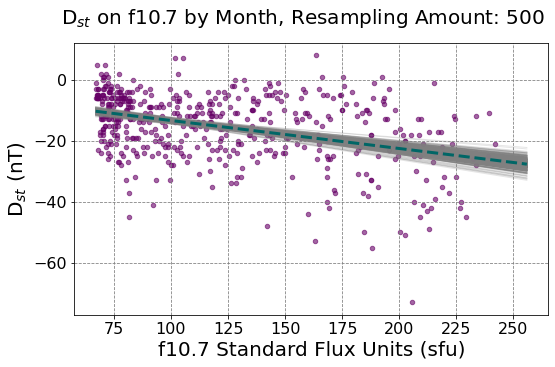

In [21]:
fig = plt.figure(figsize=(8.5, 5))
fig.suptitle('D$_{st}$ on f10.7 by Month, ' + 
             'Resampling Amount: {} \n'.format(numIterations), 
             fontsize=20)

gs  = plt.GridSpec(1, 1, hspace=0.0, wspace=0.2, right = 0.9)

#add subplots
ax1 = fig.add_subplot(gs[0,0])

#set up titles for axis
ax1.set_xlabel('f10.7 Standard Flux Units (sfu)', fontsize = 20)
ax1.set_ylabel('D$_{st}$ (nT)', fontsize = 20)

#plot values
ax1.scatter(monthlyOmni['f10.7_index'], monthlyOmni['Dst'],  
            color = '#660066', alpha = 0.6, s = 20)

#make line equally spaced
minVal  = np.nanmin(monthlyOmni['f10.7_index'])
maxVal  = np.nanmax(monthlyOmni['f10.7_index'])
spacing = (maxVal - minVal) / 20.0

#create new xarray for pretty plotting
xVals = np.arange(minVal, maxVal+spacing, int(spacing))

for slope, intercept in zip(bootstrapVals['Slopes'], bootstrapVals['Intercepts']):
    
    #calculate y values
    yModel = slope*xVals + intercept 
    
    #and plot in gray
    ax1.plot(xVals, yModel, color = 'grey', alpha = 0.2, lw = 1.0)
    
#plot final value in turquoise - 
yModelOrig = slopeOrig*xVals + interceptOrig

ax1.plot(xVals, yModelOrig, 
         color = '#006666', alpha = 1.0, linestyle = '--', lw = 3.0)


#set up grid
ax1.grid(color='gray', linestyle='dashed')

#set up label sizes
ax1.tick_params(labelsize = 16)

plt.savefig('./Figures/BootstrapLinearFits.png')


### Let's take a look at a distribution of these r values. 

The number of bins for the histogram is: 23.0
Skew: 0.2, Kurtosis: 3.0, Standard Dev: 0.0, Mean: -0.4


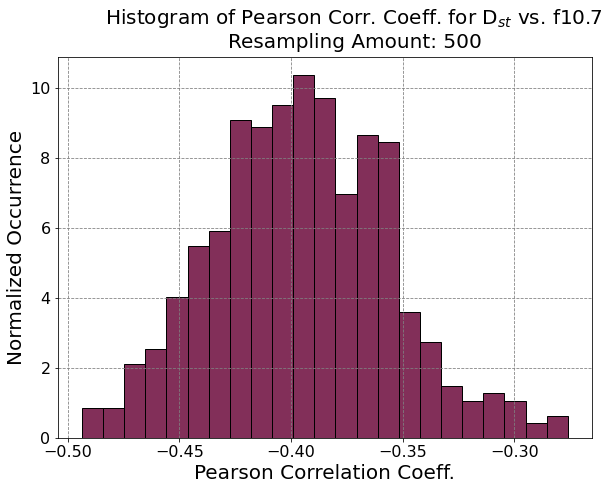

In [22]:
#what does the histogram of this look like? 

#set up the figure 
fig = plt.figure(figsize=(11, 7))
fig.suptitle('Histogram of Pearson Corr. Coeff. for D$_{st}$ vs. f10.7 \n' + 
             'Resampling Amount: {}'.format(numIterations), 
             fontsize=20)

gs = plt.GridSpec(1, 1, hspace=0.2, wspace=0.0, right = 0.8)

#add subplots
ax1 = fig.add_subplot(gs[0,0])

#calculate using the general rule of thumb - 

#minimum as the sqrt(sampleSize)
sampleSize = len(bootstrapVals['rVals'])

#could also use np.floor - both find the integer 
# - ceil rounds up and I want MORE bins than
#minimum

numBins = np.ceil(np.sqrt(sampleSize))
print("The number of bins for the histogram is: {}".format(numBins))

#values is first entry, followed by number of bins, normed is the
#normalization factor, ie normalize to 1. 

#edgecolor and linewidth set up the bin edges
ax1.hist(bootstrapVals['rVals'], int(numBins), density = 1, facecolor = '#822f59', 
         edgecolor="k")

#set up grid
plt.grid(color='gray', linestyle='dashed')

#labels
plt.xlabel('Pearson Correlation Coeff.', fontsize = 20)
plt.ylabel('Normalized Occurrence', fontsize = 20)
#large ticks
plt.xticks(fontsize=16) #make the xaxis labels larger
plt.yticks(fontsize=16) #make the yaxis labels larger

#print out stats on the skew etc
print("Skew: {:.1f}, Kurtosis: {:.1f}, Standard Dev: {:.1f}, Mean: {:.1f}".format(
        skew(bootstrapVals['rVals']), 
        kurtosis(bootstrapVals['rVals'], fisher = False), 
        np.std(bootstrapVals['rVals'], ddof = 1), 
        np.mean(bootstrapVals['rVals'])))


### What does this chart inform you about the bootstrap analysis?


-


-


-


-


-

### Finally we calculate the z-value for this comparison - 

In [23]:
#how does the z value look?
tVal = (abs((rvalOrig - np.mean(bootstrapVals['rVals']))) / 
        (np.std(bootstrapVals['rVals'], ddof = 1)))

print("The t-test results in a comparison" + 
      " of the original fit to the bootstrap fit of {:.5f}.".format(tVal))

The t-test results in a comparison of the original fit to the bootstrap fit of 0.04296.


### Is this a small or a large t-value? What does that mean about our fit? 

-

-

-

-

-

-

### What if we wanted to implement this onto *any* dataset without copy paste? Let's learn some time saving tools here.  

## *Part 3 - Time Saving for Plotting*

If you just want to run forward with some quick exploratory plots - I reccomend Seaborn. Please note it's difficult to obtain finalized plots in seaborn with what we've learned so far but I support using these quick look tools


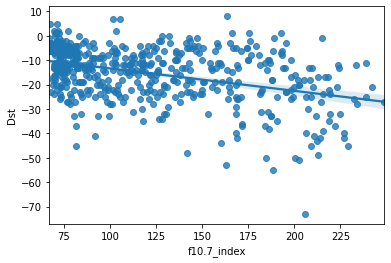

In [24]:
import seaborn as sns #this is a new package here
                      #I like to think of this as a stats + visualization package
    
#makes a quick plot AND linear fit
#runs nicely with pandas dataframes
sns.regplot(x = 'f10.7_index', y = 'Dst', data = monthlyOmni, n_boot = 1000);

#note the confidence interval drawn around the dataset 
#dependent on the bootstrap via n_boot

### You can also get the same "seaborn style" with some nifty visualization tricks...such as...

The following styles are availible:
['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


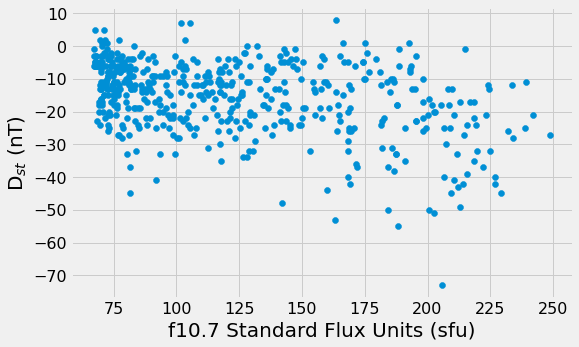

In [25]:
mpl.style.use('fivethirtyeight')
    
fig = plt.figure(figsize=(8.5, 5))


gs  = plt.GridSpec(1, 1, hspace=0.0, wspace=0.2, right = 0.9)

#add subplots
ax1 = fig.add_subplot(gs[0,0])

#set up titles for axis
ax1.set_xlabel('f10.7 Standard Flux Units (sfu)', fontsize = 20)
ax1.set_ylabel('D$_{st}$ (nT)', fontsize = 20)

#plot values
xVals = monthlyOmni['f10.7_index']
yVals = monthlyOmni['Dst']
ax1.scatter(xVals, yVals)


ax1.tick_params(labelsize = 16)


print("The following styles are availible:")
print(plt.style.available)

### The great thing about these is that you can use some of the defaults to set fontsizes etc, each time you plot!

You can find more about this here - https://matplotlib.org/tutorials/introductory/customizing.html

You can also use objects as we discussed above to make the entire script cleaner for bootstrap analysis - see Extra information after the summary. 

# SUMMARY

From this lab you have learned a new way to code - explictedly object oriented programming :). As well as how to start a bootstrap method. 


Homework: 
- Midterm reports! Keep at it - remember many things are not always linearly correlated and we are not expecting you to find a perfect fit in your projects. 

## *EXTRA: Now With More Explicit Object Oriented*

Within this section you can see section 2 repeated but by now taking advantage of a 
new class called omni which we define in the omni.py file - 

In [26]:
#we reload the omni file just in case of changes
importlib.reload(omni)

#reset the style back to basic
mpl.rcParams.update(mpl.rcParamsDefault)

#create a new instance of the object - 
exampleObj = omni.Omni(hourlyOmni['FlowPressure'], hourlyOmni['Dst'], 
                          xLabel = 'Flow Pressure (nPa)', 
                          yLabel = 'D$_{st}$ (nT)')

#check out the type of this object
print(type(exampleObj))

<class 'omni.Omni'>


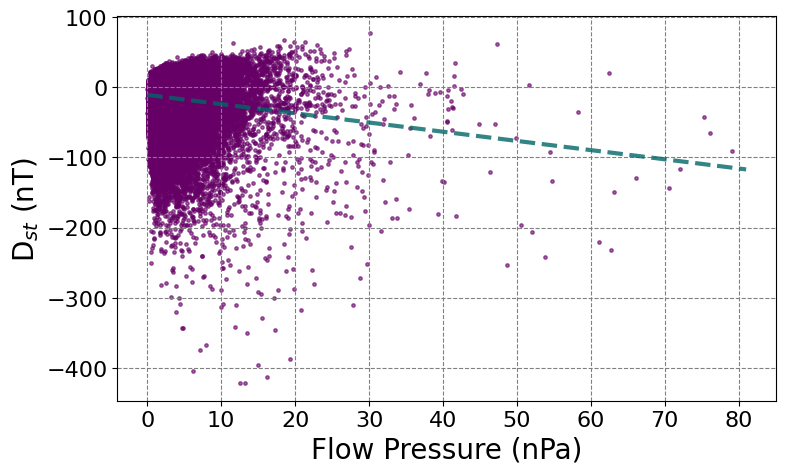

In [27]:
#now plot out the linear fit
exampleObj.plotLinReg()


In [28]:
#and print out fit report as a method of the object
exampleObj.printFitReport()


Fit Report: 
 	Uncert. on Y: +/- 21.44
 	Intercept: -10.99 +/- 0.06
	Slope: -1.31 +/- 0.02
	Pearson Linear Correlation: -0.12


In [29]:
#let's resample and calculate the fits quite a number of times - to clean
#up the process from before we wrote a bootstrap function - 

importlib.reload(bootstrap)

#given the original data and fit, run a boostrap analysis and output
#a dictionary of values of those fits
bVals = bootstrap.bootstrap(exampleObj, numIterations = 100)


#go ahead and print out what bVals is as a type



The number of bins for the histogram is: 10.0
Skew: -0.1, Kurtosis: 2.7, Standard Dev: 0.0, Mean: -0.1


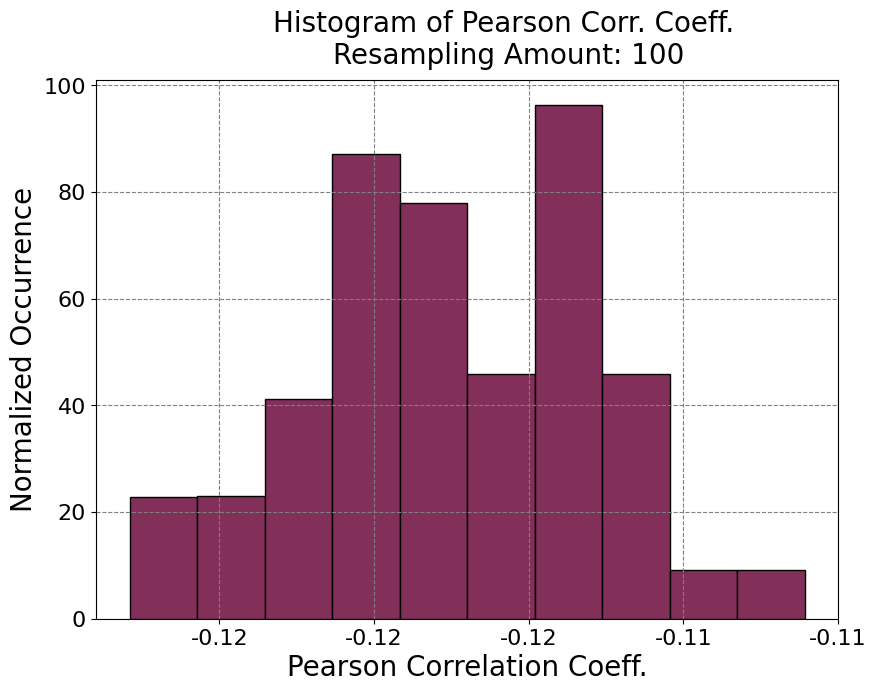

In [30]:
#let's take a look at the histogram of the rValues
bootstrap.plotRValsHist(exampleObj, bVals)


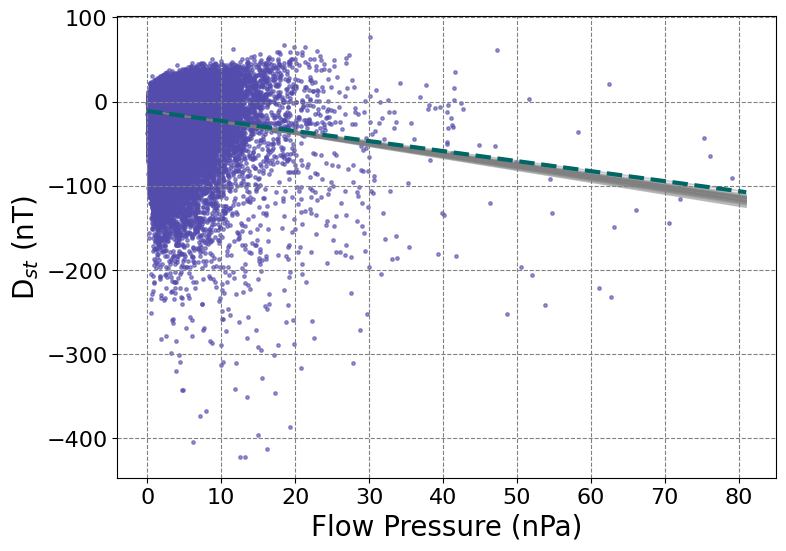

In [31]:
#and let's plot the final fits given these bootstrap 
bootstrap.plotFits(exampleObj, bVals)

In [32]:
#and the fit report - 
bootstrap.printFitReport(exampleObj, bVals)

Fit Report: 
 	Uncert. on Y: +/- 21.44
 	Intercept: -10.99 +/- 0.06
	Slope: -1.31 +/- 0.02
	Pearson Linear Correlation: -0.12 +/- 0.00461
